<a href="https://colab.research.google.com/github/agent007-cyber/demo-repo/blob/main/23BAI1031_Adarsh_Manoj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

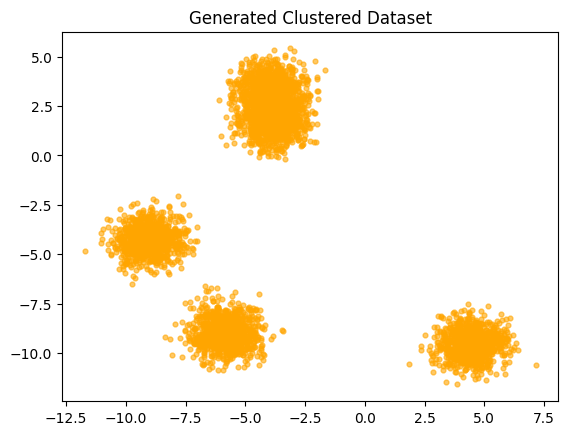

In [ ]:
points, true_labels = make_blobs(n_samples=4500, centers=5, cluster_std=0.7, random_state=21)

plt.scatter(points[:, 0], points[:, 1], s=12, alpha=0.6, c='orange')
plt.title("Generated Clustered Dataset")
plt.show()

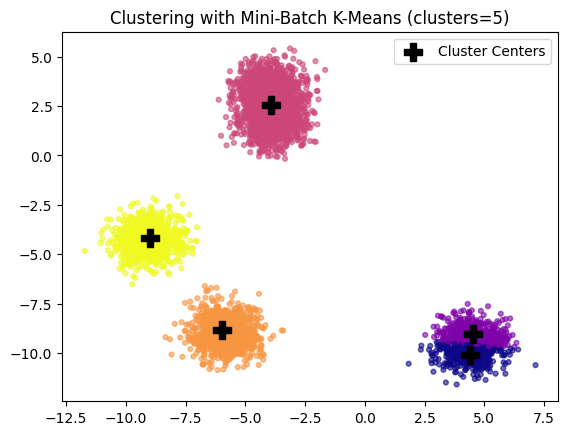

In [ ]:
clusters = 5
mini_kmeans = MiniBatchKMeans(n_clusters=clusters, batch_size=800, init="random", random_state=21)
predicted = mini_kmeans.fit_predict(points)

plt.scatter(points[:, 0], points[:, 1], c=predicted, s=12, cmap='plasma', alpha=0.6)
plt.scatter(mini_kmeans.cluster_centers_[:, 0], mini_kmeans.cluster_centers_[:, 1],
            c='black', marker='P', s=180, label='Cluster Centers')
plt.title(f"Clustering with Mini-Batch K-Means (clusters={clusters})")
plt.legend()
plt.show()


In [ ]:
subset = resample(points, n_samples=1800, random_state=21)
subset_labels = mini_kmeans.predict(subset)

sil_score = silhouette_score(subset, subset_labels)
print(f"Silhouette Value for clusters={clusters}: {sil_score:.3f}")


Silhouette Value for clusters=5: 0.695


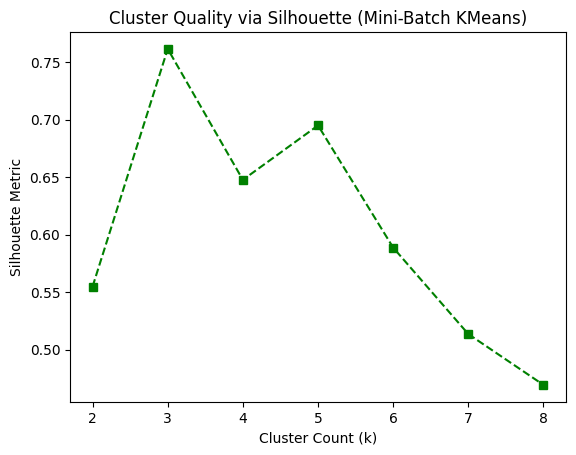

In [ ]:
scores = []
range_k = range(2, 9)

for num in range_k:
    model = MiniBatchKMeans(n_clusters=num, batch_size=800, init="random", random_state=21)
    lbls = model.fit_predict(points)

    sample_data = resample(points, n_samples=1800, random_state=21)
    sample_lbls = model.predict(sample_data)

    val = silhouette_score(sample_data, sample_lbls)
    scores.append(val)

plt.plot(range_k, scores, 'gs--')
plt.xlabel("Cluster Count (k)")
plt.ylabel("Silhouette Metric")
plt.title("Cluster Quality via Silhouette (Mini-Batch KMeans)")
plt.show()


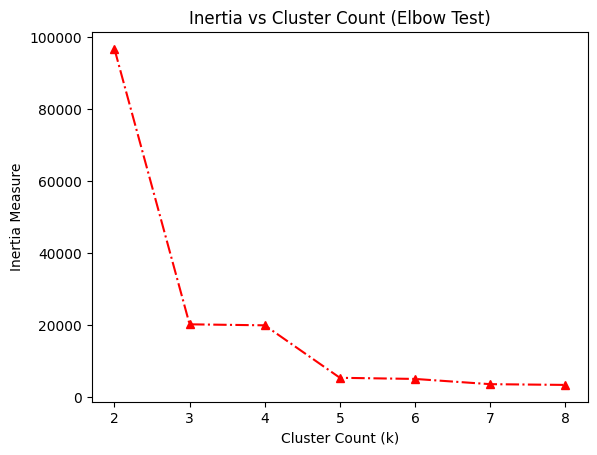

In [ ]:
inertia_values = []

for num in range_k:
    model = MiniBatchKMeans(n_clusters=num, batch_size=800, init="random", random_state=21)
    model.fit(points)
    inertia_values.append(model.inertia_)

plt.plot(range_k, inertia_values, 'r^-.')
plt.xlabel("Cluster Count (k)")
plt.ylabel("Inertia Measure")
plt.title("Inertia vs Cluster Count (Elbow Test)")
plt.show()
